## Decision Trees

<b><i>Problem : </i>Titanic Survivor Prediction</b> kaggle challenge

### Learning Goals

- How to preprocess the data ?
    >1.Dropping not useful features <br />
    >2.Filling the missing values(Data Imputation)
- Creating a Binary Decision Tree From Scratch

In [1]:
import numpy as np
import pandas as pd

### - Preprocessing Data

In [2]:
data = pd.read_csv("titanic_train.csv")

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"] #list of all columns that i need to drop ie that do not have any role to play in predicting the the passengers that survived and that did'nt survived   

In [5]:
cleaned_data = data.drop(columns_to_drop,axis = 1)

In [6]:
cleaned_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #object of labelEncoder , classifies or transforms male and female in 'sex' column to 0 and 1

cleaned_data["Sex"] = le.fit_transform(cleaned_data["Sex"])

In [8]:
cleaned_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [10]:
# performing data imputation to Age column in sata set, ie filling all the age values that are not known with either the mean or the median of all other values present int he columns
cleaned_data = cleaned_data.fillna(cleaned_data["Age"].mean())
# mistake was -> cleaned_data["Age"] = cleaned_data.fillna(cleaned_data["Age"].mean())
#i can also use imputer class available in the sklearn library for data imputation

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [12]:
cleaned_data.loc?

In [13]:
cleaned_data.loc[1]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [14]:
#dividing the data in X values ie input values and the Y values ie the output values
input_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = cleaned_data[input_cols]
Y = cleaned_data[output_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>


- <b>Making useful function like ,function for finding the entropy of a feature or a column , and the function for finding the information gain </b>

In [15]:
def entropy(col):
    counts = np.unique(col,return_counts = True) #tupple consisting of two arrays 1.array f unique elements in column ,2.array of the frequency of all unique elements in the column
    N = float(col.shape[0])
    ent=0.0
    #print(counts)
    for ix in counts[1]:
        probability = ix/N
        ent += (-1.0*probability*np.log2(probability))
    return ent
    

In [16]:
#testing entropy function

arr = np.array([1,1,1,0,1,0,0,0])
#entropy(arr) #1st array is the array of all unique element of the column, whereas the 2nd array is the array of frequency of all the unique elements in the column

entropy(arr) #return the entropy of numpy array 'arr'

1.0

- Implementing Information Gain :

In [17]:
# divide_data function
def divide_data(x_data,fkey,fval):
    x_right = pd.DataFrame([],columns = x_data.columns) #making an empty data frame ,having all the columns that are even available in the original data frame
    x_left = pd.DataFrame([],columns = x_data.columns)
    
    for ix in range(x_data.shape[0]): # running loop equal to the number of rows times
        val = x_data[fkey].loc[ix]
        
        if val>fval:
            x_right = x_right.append(x_data.loc[ix]) # append the entire row from the original dataframe
        else:
            x_left = x_left.append(x_data.loc[ix])
    return x_left,x_right

In [18]:
# pd.DataFrame?

In [19]:
#testing of divide_data()

#x_left,x_right = divide_data(cleaned_data[:10],'Sex',0.5)
#print(x_left)
#print(x_right)

In [20]:
def information_gain(x_data,fkey,fval):
    left,right = divide_data(x_data,fkey,fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0] # number of rows on left hand side
    r = float(right.shape[0])/x_data.shape[0] # number of rows on right hand side
    
    #If in case all rows come to one side only and the other side don't have any row
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -1000000  # representing Min information gain
       
    inf_gain = entropy(x_data.Survived) - (l*entropy(left.Survived) + r*entropy(right.Survived))
    return inf_gain

In [21]:
# test information_gain function 
for fx in X.columns:
    print(fx)
    print(information_gain(cleaned_data,fx,cleaned_data[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [22]:
# OOPS way creating decision tree
class DecisionTree:
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gains = []
        
        for ix in features:
            ig = information_gain(X_train,ix,X_train[ix].mean()) #ig is the information gain for that particular 'ix'th feature/column of the data
            info_gains.append(ig)
        
        self.fkey = features[np.argmax(info_gains)] #np.argmax(info_gains) -> return the index value whose value of the information gain will be maximum,then we will get that index fromt the feature array and store it in variable feature
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        # Now we just need to SPLIT the DATA
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)#reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers. It never drops columns. 
        
        # Base Case 1:Truely a leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0: # ie if either there are no rows in the left subtree or no rows in the right subtree then terminate the tree if()
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
        
        # Base Case 2:Stop early when depth >= max depth
        if(self.depth >= self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
        
        # Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        # setting the target at every node,ie we are deciding at eveery node whether the passengers survived or not instead of just calculating over the leaf nodes
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

            

In [23]:
# testing decision tree Class algorithm
d = DecisionTree() # making an object of the class DecsionTree
d.train(cleaned_data) #calling the train() function of the DecisionTree class and passing the cleaned_data that we preprocessed earlier as the argument of the function to build the tree 

#the feature can repeat as they are getting repeated in different branches

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Feat

## Train-Validation-Test Set Split


<b><i> When you are going to create decision tree you will create three sets 1. training set:which is already given 2.Validation set:it is sometimes given and sometimes its not given so if it is not given then we can split around 20% of our training set data as validation set 3.Test Set : can e downloaded from the internet ,but only after uploading the predictions to Kaggle </i></b>

<b>In my current example i am not doing any kind of validation,because generally this data set is used to tune what should be the ideal depth of the decision tree,so we can do validation on our own</b>

In [24]:
#making 2 sets ,1.for training ,2.testing
split = int(0.7 * cleaned_data.shape[0]) #0.7 signifies 70% of data 
train_data = cleaned_data[:split]
test_data = cleaned_data[split:]
test_data = test_data.reset_index(drop = True)

In [25]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [26]:
# training out decision tree model
dt = DecisionTree() # making object of the class Decision Tree

In [27]:
dt.train(train_data)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making Tre

In [28]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [29]:
# generating predictions for our test data
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [30]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Survived',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',


In [31]:
y_actual = test_data[output_cols]

In [32]:
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [33]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [34]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [35]:
#print(y_pred.shape)
y_pred = np.array(y_pred).reshape((-1,1)) # -1 signifies no change should be made in rows, and 1 signifies that number of columns shoul be 1

#now shape of y_pred and y_actual will be same
print(y_pred.shape)

print(y_actual.shape)

(268, 1)
(268, 1)


In [36]:
#acc = np.sum(y_pred == y_actual)/y_pred.shape[0]
acc = np.sum(np.array(y_pred) == np.array(y_actual))/y_pred.shape[0]

In [37]:
print(acc)

0.8171641791044776


# Decision Tree Using Sklearn

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
#sk_tree = DecisionTreeClassifier?

In [40]:
sk_tree = DecisionTreeClassifier

In [41]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [42]:
#training decision tree
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [44]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

## Visualizing a Decision Tree

In [48]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [49]:
dot_data = StringIO() #creating an object of the class StringIO
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

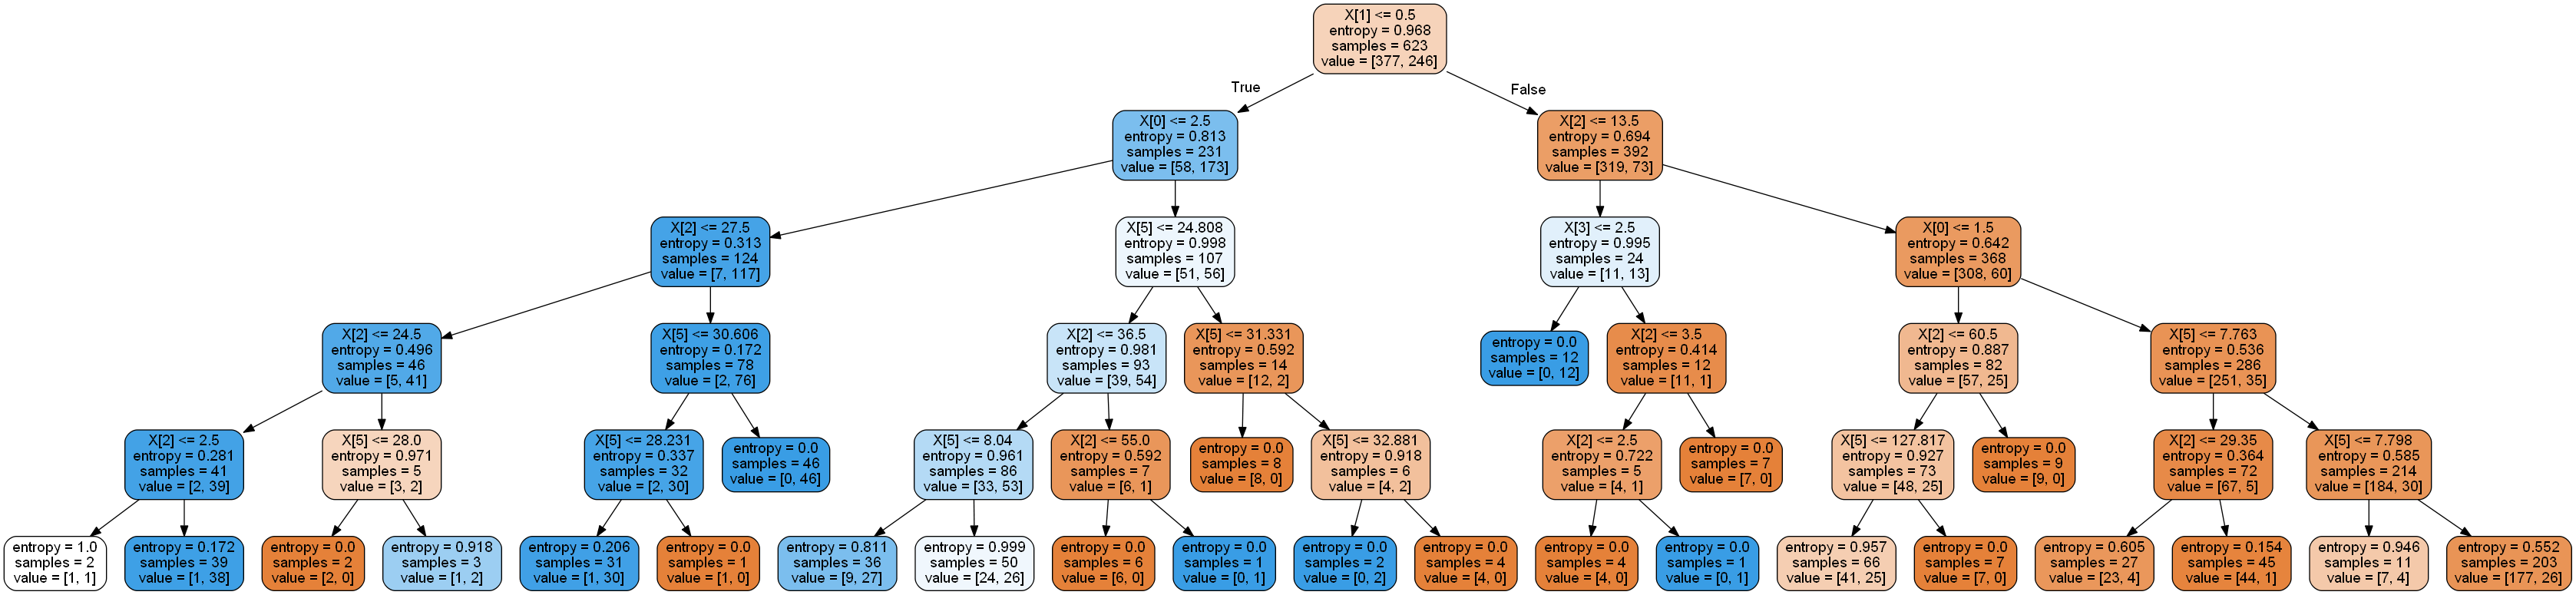

In [50]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

<b><i>This is basically a type of ensembling technique,which means ,you train multiple modeslie you train multiple (week) classifiers and then you take a kinf of either average of majority of those results</i></b>

<b><i>Random forsts are implemented to overcome the problems of decision trees</i></b>

<b>Assumption behind the random forests:</b>
- So this idea of Majority Prediction in random forests help you to improve your accuracy , as now we are not relying only on 1 model ,now we are relying on multiple such trees , and obviously all of them cannot be wrong ,atleast majority of them will give correct predictions.That's what the assumption is made in random forests.It really helps when you put things into practice.


In [52]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [57]:
#checking for overfitting
#training model withou specifying the maximum depth
#sk_tree = DecisionTreeClassifier(criterion = 'entropy') # here we are training the model , without specifyinf the maximum depth of the tree,to check whether it result in overfitting or not

In [61]:
# 1 way to prevent overfitting : ie training the model by specifying the maximum depth
# in this way you nees to find out the hyper parameter ie max_depth parameter
sk_tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)

In [62]:
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train) # accuracy of training data 

0.8443017656500803

In [63]:
sk_tree.score(X_test,Y_test)

# we can observe from above cell and thos cell that for the model trained without specifying the maximum depth,we get an accuracy of 98% for the training data that's quite a good accuracy, and an accuracy of 77% for the test data that's very low
# so we can see that the training set and the test set performance is not comparable 

# So we will say that model is overfitting when the accuracy of training set and test set is not comparable , ie there is a large difference between the accuracy of training set and that of the test set


0.8283582089552238

- <i>Now lets see the second way Random forest ie learning over multiple such trees to predict the results</i>

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# rf = RandomForestClassifier?

In [68]:
rf = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',max_depth=5)

In [69]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
# now checking the accuracy of training set over random-Forest Model
rf.score(X_train,Y_train)

0.8459069020866774

In [74]:
# now checking the accuracy of test set over random-Forest Model,and then comparing it with the accuracy of that of the training set
rf.score(X_test,Y_test)

0.8395522388059702

- Since both the training and the test accuracies are close to each other , that means we have achieved a good generalization

#### Cross Validation   

In [110]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=34,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

# way to find the value of the argument n_estimators have been shown below

In [111]:
print(acc)

# it is giving 82% accuracy .which is good, but the reason for a little bit decrease in accuracy is because this time we are not using entire training set.ie we divide our set into parts and in different folds we are considering different parts of the set as validation set ans train on rest of the parts
# for exampl we divide our set into 4 parts, then we first consider the first part as the validation set and train the model on rest of the three parts, then we consider the second part as the validation set and then train the model on rest of the parts, and so on..,since the training set is reduced even 
# further so we get a little decrement in the accuracy of the training data

0.8218193548387097


In [115]:
# lest's determine the effect of the number of trees in random forest on the accuracy and save all the accuracies in the accuracy list

acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [116]:
print(acc_list)

# we can see from the list that 0.82__ is somehow the maximum accuracy that can be achieved

[0.7352000000000001, 0.7880645161290323, 0.7864645161290322, 0.8089419354838709, 0.8057677419354838, 0.8009032258064515, 0.8138064516129031, 0.7880774193548387, 0.8170451612903225, 0.8121548387096775, 0.8073290322580645, 0.8185677419354839, 0.8121677419354839, 0.8137806451612903, 0.8186064516129032, 0.7977548387096773, 0.8009935483870969, 0.8041032258064515, 0.8169677419354839, 0.7977032258064516, 0.8041935483870969, 0.8153806451612903, 0.8185935483870967, 0.8185290322580645, 0.8185548387096773, 0.8057290322580645, 0.8121290322580645, 0.8170193548387097, 0.8121419354838709, 0.8057161290322579, 0.8249935483870967, 0.8041677419354839, 0.8041419354838709, 0.8298193548387097, 0.8153677419354839, 0.8105419354838709, 0.8185677419354839, 0.8281935483870967, 0.8169677419354839, 0.8153806451612903, 0.8250064516129033, 0.8169548387096774, 0.8185806451612903, 0.8201677419354839, 0.8137935483870967, 0.8137677419354838, 0.8105548387096775, 0.8201935483870967, 0.8137806451612903]


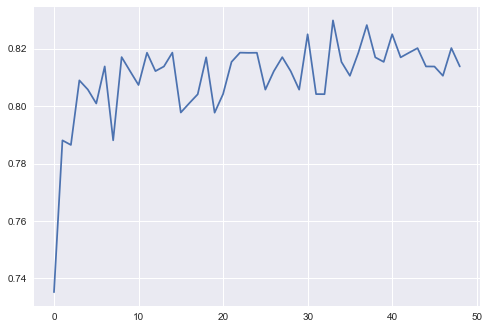

In [117]:
# plotting acc_list on graph 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)

In [119]:
print(np.argmax(acc_list)) 

# from the graph and from finding the maximum argument we can observer that the maximum accuracy can be achieved around 33, but since the indxing of graph starts from 0 ,but we have started from 1 so we will take 33+1=34 trees 

33


In [120]:
# So now lets check and train our RandomForest on 33+1=34 trees and see what accuracy it gives on test data
rf = RandomForestClassifier(n_estimators=34,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=34,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
rf.score(X_train,Y_train)

0.8523274478330658

In [122]:
rf.score(X_test,Y_test)

0.835820895522388

# Congrats To Me on Completion of "Titanic Kaggle Challenge"       :)